### Import both third-party packages and personal defined modules

In [15]:
import os
from dotenv import load_dotenv
import torch

In [16]:
from utils.config_utils import load_ddpm_config, load_dip_config, load_img_config, load_guide_dip_config
from utils.plot_utils import plot_snapshots, plot_sequence, plot_psnr
from utils.image_utils import load_image_to_tensor, pillow2image
from models.model import DDPM, DIP
from train.train_dip import train_dip

### load the configs

In [17]:
config_path = "config.yaml"
load_dotenv()
DATA_ENTRY = str(os.getenv("DATA_ENTRY"))

image_path = os.path.join(DATA_ENTRY, "Image_1.jpg")

In [18]:
ddpm_config = load_ddpm_config(config_path)
dip_config = load_dip_config(config_path)
height, width = load_img_config(config_path)
guide_dip_config = load_guide_dip_config(config_path)

### Test for DDPM and DIP
* the add noise process
* dip train on the target clean image

show the process of diffusion forward

In [19]:
diffusion = DDPM(**ddpm_config)
target_image = load_image_to_tensor(image_path, height, width)

Start adding noise to the target image in data/test\Image_1.jpg time stamp 40
Start adding noise to the target image in data/test\Image_1.jpg time stamp 85
Start adding noise to the target image in data/test\Image_1.jpg time stamp 130
Start adding noise to the target image in data/test\Image_1.jpg time stamp 175
Start adding noise to the target image in data/test\Image_1.jpg time stamp 220
Start adding noise to the target image in data/test\Image_1.jpg time stamp 265
Start adding noise to the target image in data/test\Image_1.jpg time stamp 310
Start adding noise to the target image in data/test\Image_1.jpg time stamp 355
Start adding noise to the target image in data/test\Image_1.jpg time stamp 400


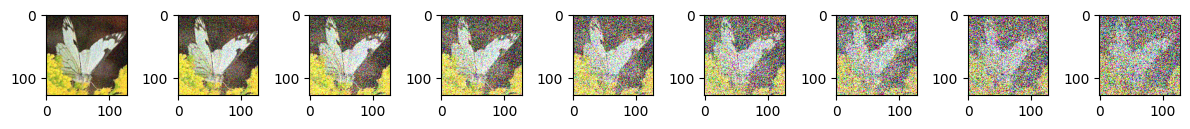

In [20]:
ts = torch.linspace(40, 400, 9)
sequences = []

for t in ts:
    t = int(t.item())
    print(f"Start adding noise to the target image in {image_path} time stamp {t}")
    noisy_image, _ = diffusion.forward_diffusion(target_image, t)
    noisy_image = noisy_image.squeeze(0)
    noisy_image = noisy_image.permute(1,2,0)
    sequences.append( pillow2image(noisy_image) )

plot_sequence(sequences, plot_method="plot")

show the dip model backbone

In [21]:
model = DIP(dip_config["backbone_name"])
print("=============================================================================")
print(model)
print("=============================================================================")
print("The above is the DIP model backbone!!")

DIP(
  (backbone): UNet(
    (leaky_relu): LeakyReLU(negative_slope=0.01)
    (d_conv_1): Conv2d(3, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (d_bn_1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (d_conv_2): Conv2d(8, 16, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (d_bn_2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (d_conv_3): Conv2d(16, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (d_bn_3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (s_conv_3): Conv2d(32, 4, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (d_conv_4): Conv2d(32, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (d_bn_4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (s_conv_4): Conv2d(64, 4, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (d_conv_5): Conv2d(64, 128, kernel_size=(5, 5), stride=(2, 2

show the dip training process snapshots on original image

In [22]:
noisy_image, _ = diffusion.forward_diffusion(target_image, 30)

losses, snapshots, _ = train_dip(model, noisy_image, **dip_config)

100%|██████████| 300/300 [00:26<00:00, 11.46it/s]


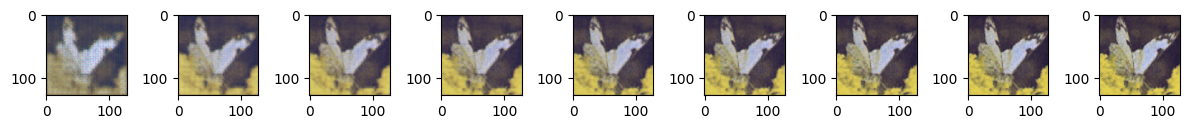

In [23]:
indices = [ int(i) for i in torch.linspace(10, len(snapshots)-1, 10) ]
plot_sequence([ snapshots[i] for i in indices ])

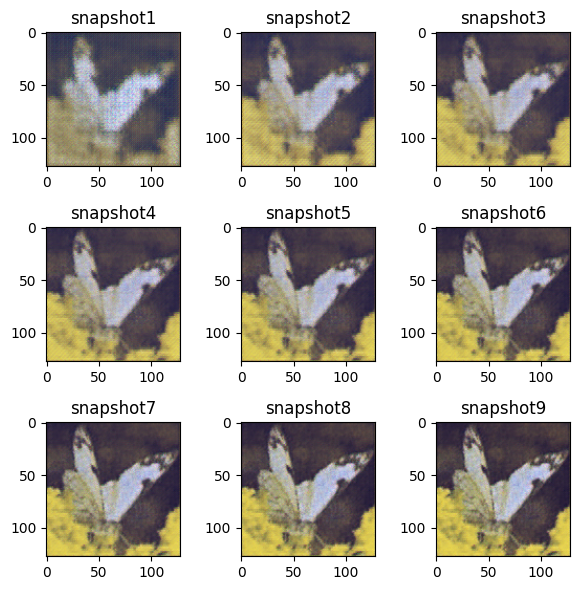

In [24]:
plot_snapshots([ snapshots[i] for i in indices ])